# Training Module for Proposed Model

# Import Libraries

In [1]:
import pickle
import numpy as np
from plib.data import get_data,minmax_norm,data_split
from plib.feature_selection import out_features
from plib.p_metric import main_perf_metrics_calc
import  plib.emodel as model

# Read and Process Dataset

In [2]:
X_train ,Y_train,train_df =get_data('./plib/dataset/train.csv')
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
train_df.describe()

Number of rows: 1190;  Number of columns: 12; No of missing values 0
Shape of X_train: (1190, 11)
Shape of y_train: (1190,)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# Data Normalization

In [3]:
X_train=minmax_norm(X_train)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
classes=len(np.unique(Y_train))
print("Classes: ",classes)

Shape of X_train: (1190, 11)
Shape of y_train: (1190,)
Classes:  2


# Split Data for Train and Test

In [4]:
xtrain, xvalid, ytrain, yvalid,fold=data_split(X_train,Y_train,test_size=0.2)
print("Shape of X_train:", xtrain.shape)
print("Shape of y_train:", ytrain.shape)
print("Shape of X_test:", xvalid.shape)
print("Shape of y_test:", yvalid.shape)


Shape of X_train: (952, 11)
Shape of y_train: (952,)
Shape of X_test: (238, 11)
Shape of y_test: (238,)


# Feature Selection

In [5]:
opts = {'k':5, 'fold':fold, 'N':X_train.shape[0], 'T':7, 'w':0.7, 'c1':2, 'c2':2}
x_train, x_test, y_train, y_test,b_feat= out_features(X_train,Y_train,opts,xtrain, xvalid, ytrain, yvalid)
print ("Number of Best Features: ",b_feat)

sel_feat_ratio=60
w=round(x_train.shape[1]*sel_feat_ratio/100)
print(b_feat,w)
if w > b_feat:
    x_train=x_train[:,0:  w]
    x_test=x_test[:,0:w]
    print("Seleted Feature Composition: ",x_train.shape,x_test.shape)
    print('You choosed worse features too.')
else:
    x_train=x_train[:,0:  w]
    x_test=x_test[:,0:w]
    print("Seleted Feature Composition: ",x_train.shape,x_test.shape)
    
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Iteration: 1
Best (PSO): 0.39304715333998624
Iteration: 2
Best (PSO): 0.39304715333998624
Run Time --- 1.3748774528503418 seconds ---
Number of Best Features:  5
5 7
Seleted Feature Composition:  (952, 7) (238, 7)
You choosed worse features too.
Shape of X_train: (952, 7)
Shape of y_train: (952,)
Shape of X_test: (238, 7)
Shape of y_test: (238,)


# Model Training

In [7]:
net=model.ensemble_models(0,x_train, y_train,x_test,y_test)
for x in range(len(net)): 
    #print("Name: ",x)
    net[x].summary()
    net[x].fit(x_train, y_train,
                  batch_size=10,
                  epochs=100,
                  validation_data=(x_test, y_test),
                  shuffle=False,verbose=0)
    net[x].save('model/ensemble.h5')
    

7
7
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 add_9 (Add)                    (None, 7)            0           ['input_2[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 activation_9 (Activation)      (None, 7)            0           ['add_9[0][0]']                  
                                                                                                  
 add_10 (Add)                   (None, 7)            0           ['activation_9[0][0]', 

 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 952)               7616      
                                                                 
 dense_10 (Dense)            (None, 1)                 953       
                                                                 
 dense_20 (Dense)            (None, 952)               1904      
                                                                 
 dense_21 (Dense)            (None, 1)                 953       
                                                                 
Total params: 11,426
Trainable params: 11,426
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow import keras
ensemble = keras.models.load_model('model/ensemble.h5')

loss_train,acc_train=ensemble.evaluate(x_train,y_train)
print("loss_train: ",loss_train)
print("acc_train: ",acc_train*100,"%")

30/30 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.8088
loss_train:  0.1392199993133545
acc_train:  80.88235259056091 %


# Ensemble Deep Learning

Epoch 1/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.8036
Epoch 2/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.8120
Epoch 3/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.8004
Epoch 4/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1360 - accuracy: 0.8183
Epoch 5/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.8109
Epoch 6/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1450 - accuracy: 0.7952
Epoch 7/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.8036
Epoch 8/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.8151
Epoch 9/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1434 - accuracy: 0.7920
Epoch 10/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1358 - accuracy: 0.8151
Epoch 11/

96/96 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.8015
Epoch 84/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.8057
Epoch 85/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.8036
Epoch 86/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.8130
Epoch 87/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1382 - accuracy: 0.8172
Epoch 88/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1380 - accuracy: 0.8214
Epoch 89/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1374 - accuracy: 0.8078
Epoch 90/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.8141
Epoch 91/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.8109
Epoch 92/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1380 - accuracy: 0.8183
Epoch 93/100


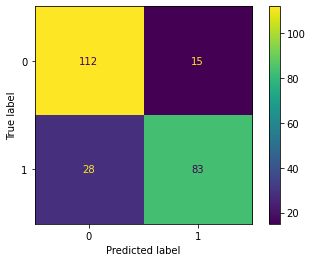

Accuracy, sensitivity, specificity, Precision, F1-score
(0.7727873183619551, 0.819327731092437, 0.693950177935943, 0.819327731092437, 0.819327731092437)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
filename = 'model/final_model.ensemble'
model = KerasClassifier(model=ensemble, epochs=100, batch_size=10, verbose=1)
model.fit(x_train, y_train)
pickle.dump(model, open(filename, 'wb'))

#load model
#model = pickle.load(open(filename, 'rb'))

y_pred=model.predict(x_test)
measures =main_perf_metrics_calc(y_test, y_pred.round(),classes)
print(measures)
measures_table = dict()
measures_table['Ensemble_Train'] = measures

# Showing All performance Measures for Ensemble Classifier in Table

In [11]:
def header():
    for x in range(90):
        print ('-',end = '')
    print('')
    
header()
print ("{:<18} | {:<11} | {:<11} | {:<11} | {:<10} | {:<10}".format('Classifier','Accuracy %', 'Sensitivity', 'Specificity','Precision','F1-Score'))
 
# print each data item.
for key, value in measures_table.items():
    Acc,Sen,Spec,Prec,F1 = value
#    header()
    if key == 'GradientBoosting':
        key ='Gradient'
    print ("{:<18} | {:<11} | {:<11} | {:<11} | {:<10} | {:<10} ".format(key,round(Acc*100,3),round(Sen,3),round(Spec,3),round(Prec,3),round(F1,3)))
header()

------------------------------------------------------------------------------------------
Classifier         | Accuracy %  | Sensitivity | Specificity | Precision  | F1-Score  
Ensemble_Train     | 77.279      | 0.819       | 0.694       | 0.819      | 0.819      
------------------------------------------------------------------------------------------


# Saving Results to File

In [12]:
import os
# Create Folder for Results if not exist
if not os.path.exists('Results'):
    os.makedirs('Results')

In [13]:
#####################################################
                ## Using Pickle
################################################        
#import pickle
# Open a file and use dump()
#with open('results/NN.pkl', 'wb') as file:
    # A new file will be created
#    pickle.dump(measures_table, file)    

In [14]:
#####################################################
                ## Using CSV
################################################
# import csv
#w = csv.writer(open("Results/NN.csv", "wb"))

# loop over dictionary keys and values
#for key, val in measures_table.items():
#    print(key,val)
    # write every key and value to file
#    w.writerow([key, val])

In [15]:
#####################################################
                ## Using JSON
#####################################################
# load json module
import json

# python dictionary with key value pairs

# create json object from dictionary
json = json.dumps(measures_table)

# open file for writing, "w" 
f = open("Results/Proposed_Training.json","w")

# write json object to file
f.write(json)

# close file
f.close()